##Problem Statement:
Create a machine learning model to predict revenue of the restaurant based on
the independent features present in the dataset. Use "Restaurant revenue" dataset which contains 100 observations of restaurants with 8 attributes:
1. ID - Restaurant ID
2. Name - Name of the Restaurant
3. Franchise - Restaurant has franchise or not
4. Category - specific type of category provided by restaurant
5. City - city in which the restaurant is located
6. No_of_item - Different types of items provided by restaurant
7. Order_Placed - Order placed by customer to restaurant (in lacs)
8. Revenue - Total amount of income generated by the restaurant

Importing the necessary libraries

In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt

Loading the dataset

In [2]:
df=pd.read_csv('revenue_prediction.csv')
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


Examining the missing values in dataset

In [3]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

Removing unnecessary and irrelevant columns which don't affect the revenue to a great extent

In [4]:
df=df.drop(columns=['Id','Name','Franchise','Category','City','No_Of_Item'])
df.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


In [5]:
df.shape

(100, 2)

Create indepedent feature and dependent variable

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

Splitting the dataset into Traning and Test set

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train

array([[ 6.8],
       [ 1.9],
       [ 2.1],
       [ 4.8],
       [ 3.3],
       [ 3.1],
       [ 6.7],
       [ 6.3],
       [ 5.3],
       [ 2.4],
       [ 5. ],
       [ 7.7],
       [ 7.2],
       [ 4.6],
       [ 3.3],
       [ 4.9],
       [ 1.7],
       [ 1.6],
       [ 3.6],
       [10.8],
       [ 8.5],
       [ 4. ],
       [ 4.3],
       [ 1.1],
       [ 5.3],
       [ 1.9],
       [ 3.9],
       [ 3.6],
       [ 5.1],
       [ 4.7],
       [ 8.8],
       [ 2.5],
       [ 8.1],
       [ 5.3],
       [ 4.8],
       [ 3.5],
       [ 5. ],
       [ 2.4],
       [ 2.8],
       [ 2.1],
       [ 2.1],
       [ 4.4],
       [ 4.5],
       [ 2.6],
       [ 1.9],
       [ 3.8],
       [ 4.1],
       [ 3.6],
       [ 4.2],
       [ 6.2],
       [ 6.1],
       [ 4.4],
       [ 2.9],
       [ 7.1],
       [ 2.1],
       [ 3.1],
       [13. ],
       [ 3.1],
       [ 3.5],
       [ 3.4],
       [ 1.5],
       [ 3.9],
       [ 2.6],
       [ 3.3],
       [ 6.8],
       [ 1.6],
       [ 1

In [9]:
x_test

array([[5.7],
       [5.4],
       [3.8],
       [3.6],
       [4. ],
       [3.7],
       [3.8],
       [3.5],
       [3.6],
       [5.5],
       [5.2],
       [2.9],
       [3.1],
       [2.2],
       [3.3],
       [4.2],
       [4.3],
       [1.7],
       [1.6],
       [1.9]])

In [10]:
y_train

array([ 6941173,  2025297,  2967425,  4952255,  3452382,  3918918,
        6836483,  6412623,  4544227,  2525375,  3861370,  7865428,
        7495092,  7705945,  3410878,  4517319,  1882131,  1756069,
        3903884, 19696939,  8630682,  4100886,  6491607,  1270499,
        6135276,  1521934,  4066618,  2778621,  5286212,  5107746,
        7904084,  2175511,  7513524,  5461700,  5152497,  3871344,
        5966635,  2551252,  3028267,  2364478,  2390534,  4567678,
        4651866,  2732645,  2156098,  4052733,  4250758,  3836721,
        4350573,  6694797,  6313221,  4554237,  3004429,  7201784,
        2344689,  3258837, 16549064,  3261924,  3753720,  3600467,
        1619683,  4250553,  2740687,  2447890,  7223131,  1763231,
         849870,  2555379,  1999068,  5906596,  2083447,  5500818,
        3351383,  3807496,  5025735,  3164972,  4136425,  1099097,
        6782425,  3273041])

In [11]:
y_test

array([5966193, 5595267, 3982767, 3752885, 4264176, 3818055, 4956086,
       3727364, 3945135, 5953753, 4937526, 2408199, 3347767, 2371202,
       3426169, 4816715, 4590423, 1904842, 2234634, 2358644])

Training the Simple Linear Regression model on the training set

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Predicting the test set results

In [14]:
y_pred=lr.predict(x_test)

In [15]:
y_pred

array([6351103.23642517, 5984998.65773576, 4032440.90472562,
       3788371.18559935, 4276510.62385189, 3910406.04516249,
       4032440.90472562, 3666336.32603622, 3788371.18559935,
       6107033.5172989 , 5740928.9386095 , 2934127.16865742,
       3178196.88778369, 2079883.15171548, 3422266.60690995,
       4520580.34297816, 4642615.20254129, 1469708.85389981,
       1347673.99433668, 1713778.57302608])

Visualizing the training set results

Text(0, 0.5, 'Revenue')

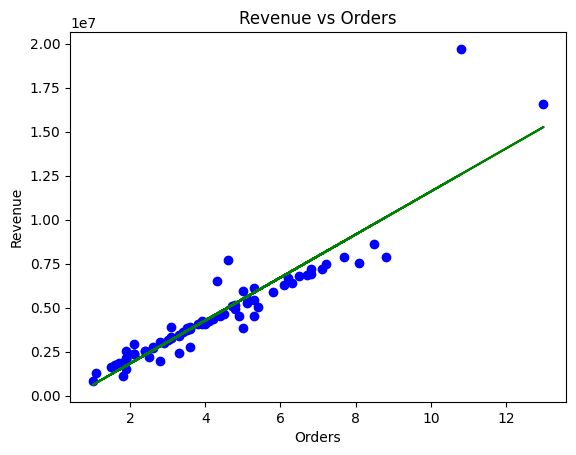

In [17]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,lr.predict(x_train),color='green')
plt.title('Revenue vs Orders')
plt.xlabel('Orders')
plt.ylabel('Revenue')

Visualizing the test set results

Text(0, 0.5, 'Revenue')

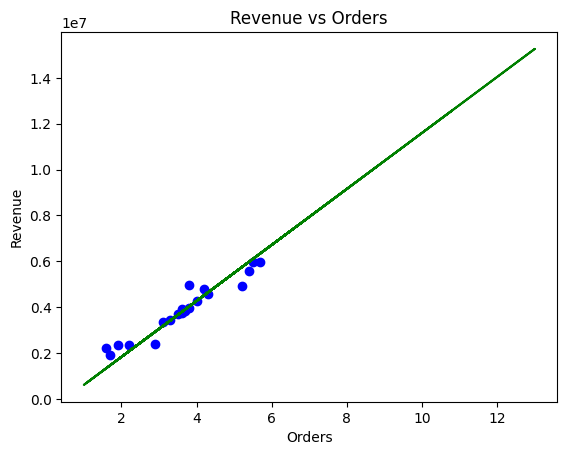

In [18]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_train,lr.predict(x_train),color='green')
plt.title('Revenue vs Orders')
plt.xlabel('Orders')
plt.ylabel('Revenue')

Finding the Accuracy of the model

In [21]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
print('Accuracy:',score)

Accuracy: 0.9109612329066813


Linear Regression model gives an accuracy of 91% for this particular dataset